In [182]:
import pandas as pd

In [183]:
foot_traffic = pd.read_csv('/Users/rajpalnati/Downloads/Foot_Traffic_Long_Format.csv')
sales_data = pd.read_csv('/Users/rajpalnati/Downloads/sales_dataset.csv')
og_data = pd.read_csv('/Users/rajpalnati/Downloads/cleaned_combined_items-2.csv')

In [184]:
foot_traffic.info()
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          385 non-null    object
 1   Time          385 non-null    object
 2   Foot_Traffic  385 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11849 entries, 0 to 11848
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11849 non-null  object 
 1   Time    11849 non-null  object 
 2   Item    11849 non-null  object 
 3   Qty     11849 non-null  float64
dtypes: float64(1), object(3)
memory usage: 370.4+ KB


In [185]:
foot_traffic = foot_traffic.rename(columns={'DATE': 'Date'})
foot_traffic.head()

,Date,Time,Foot_Traffic
0,2022-05-14,07:00:00,290
1,2022-05-14,08:00:00,680
2,2022-05-14,09:00:00,797
3,2022-05-14,10:00:00,648
4,2022-05-14,11:00:00,478


In [186]:
# Convert 'Date' and 'Time' to datetime for accurate merging
foot_traffic['Datetime'] = pd.to_datetime(foot_traffic['Date'] + ' ' + foot_traffic['Time'])
sales_data['Datetime'] = pd.to_datetime(sales_data['Date'] + ' ' + sales_data['Time'])

# Sort before using merge_asof (required for proper merging)
foot_traffic = foot_traffic.sort_values('Datetime')
sales_data = sales_data.sort_values('Datetime')

# Merge df2 into df1 based on the closest previous hour
merged_data = pd.merge_asof(sales_data, foot_traffic, on='Datetime', by='Date', direction='backward')


#merged_data = pd.merge(foot_traffic, sales_data, on=['Date'], how='outer')

In [187]:
merged_data['Transaction'] = merged_data.index
merged_data = merged_data.rename(columns={'Time_x': 'Time_Exact', 'Time_y': 'Time_Hour', 'Foot_Traffic': 'Foot_Traffic_HourCount'})
merged_data = merged_data[['Transaction', 'Date', 'Time_Hour', 'Time_Exact', 'Foot_Traffic_HourCount', 'Item', 'Qty']]

og_data = og_data.rename(columns={'Time': 'Time_Exact'})
og_data = og_data[['Date', 'Time_Exact', 'Gross Sales']]
merged_data = pd.merge(merged_data, og_data, on=['Date', 'Time_Exact'], how='right')

In [188]:
merged_data.info()
merged_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23629 entries, 0 to 23628
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction             23629 non-null  int64  
 1   Date                    23629 non-null  object 
 2   Time_Hour               23575 non-null  object 
 3   Time_Exact              23629 non-null  object 
 4   Foot_Traffic_HourCount  23575 non-null  float64
 5   Item                    23629 non-null  object 
 6   Qty                     23629 non-null  float64
 7   Gross Sales             23629 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.6+ MB


,Transaction,Date,Time_Hour,Time_Exact,Foot_Traffic_HourCount,Item,Qty,Gross Sales
0,5661,2023-10-28,11:00:00,11:41:41,432.0,Drink 2 - Cold Brew - FM,1.0,5.00
1,5659,2023-10-28,11:00:00,11:40:39,432.0,Croissant - Pumpkin Croissant - FM,1.0,5.75
2,5660,2023-10-28,11:00:00,11:40:39,432.0,Croissant - Pain Au Chocolat - FM,1.0,5.75
3,5659,2023-10-28,11:00:00,11:40:39,432.0,Croissant - Pumpkin Croissant - FM,1.0,6.35
4,5660,2023-10-28,11:00:00,11:40:39,432.0,Croissant - Pain Au Chocolat - FM,1.0,6.35
...,...,...,...,...,...,...,...,...
23624,5664,2024-05-18,07:00:00,07:10:47,593.0,Almond Croissant - FM,1.0,5.50
23625,5662,2024-05-18,07:00:00,07:10:18,593.0,Ube & Strawberry Croissant - FM,1.0,5.50
23626,5663,2024-05-18,07:00:00,07:10:18,593.0,Pain Aux Raisin - FM,1.0,5.50
23627,5662,2024-05-18,07:00:00,07:10:18,593.0,Ube & Strawberry Croissant - FM,1.0,5.75


In [ ]:

merged_data.to_csv('/Users/rajpalnati/Downloads/fm_sales_data.csv', index=False)



                        Transaction  Foot_Traffic_HourCount       Qty  \
Transaction                1.000000                0.210178 -0.011385   
Foot_Traffic_HourCount     0.210178                1.000000 -0.064855   
Qty                       -0.011385               -0.064855  1.000000   
Gross Sales                0.046694               -0.059873  0.512113   

                        Gross Sales  
Transaction                0.046694  
Foot_Traffic_HourCount    -0.059873  
Qty                        0.512113  
Gross Sales                1.000000  


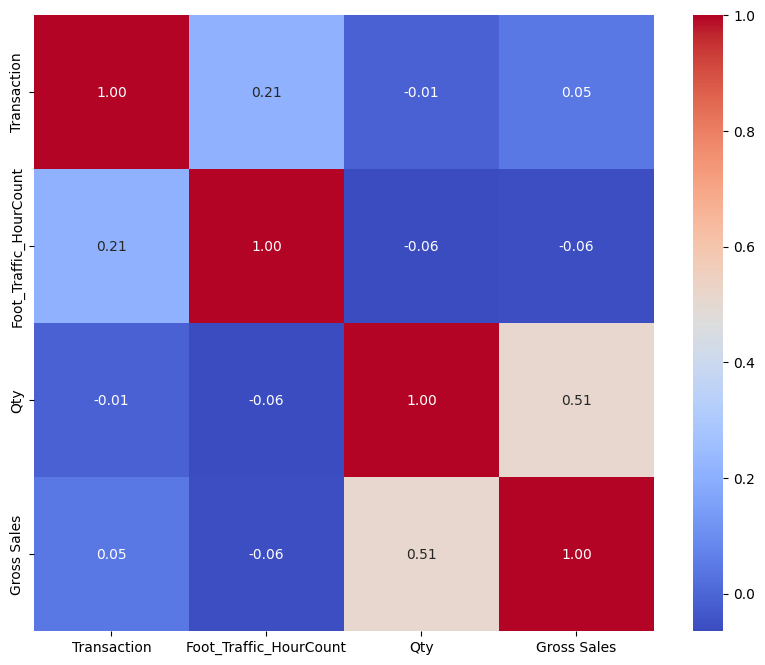

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt




correlation_matrix = merged_data.corr()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.show()




In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('/Users/rajpalnati/Downloads/combined_dataset_2324.csv')
df


,Item,Qty,Datetime,Traffic
0,Drink 2 - Cold Brew - FM,1,2023-10-28 11:41:41,432
1,Croissant - Pain Au Chocolat - FM,1,2023-10-28 11:40:39,432
2,Croissant - Pumpkin Croissant - FM,1,2023-10-28 11:40:39,432
3,Croissant - Pumpkin Croissant - FM,1,2023-10-28 11:34:11,432
4,Croissant - Pain Au Chocolat - FM,1,2023-10-28 11:33:24,432
...,...,...,...,...
11843,Butter Croissant - FM,1,2024-05-18 07:14:30,593
11844,Kouign Amann - FM,1,2024-05-18 07:13:11,593
11845,Almond Croissant - FM,1,2024-05-18 07:10:47,593
11846,Ube & Strawberry Croissant - FM,1,2024-05-18 07:10:18,593


In [215]:
df.dtypes


Item        object
Qty          int64
Datetime    object
Traffic      int64
dtype: object

In [219]:
# Prep data
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df

,Item,Qty,Datetime,Traffic,Hour,DayOfWeek,Month
0,Drink 2 - Cold Brew - FM,1,2023-10-28 11:41:41,432,11,5,10
1,Croissant - Pain Au Chocolat - FM,1,2023-10-28 11:40:39,432,11,5,10
2,Croissant - Pumpkin Croissant - FM,1,2023-10-28 11:40:39,432,11,5,10
3,Croissant - Pumpkin Croissant - FM,1,2023-10-28 11:34:11,432,11,5,10
4,Croissant - Pain Au Chocolat - FM,1,2023-10-28 11:33:24,432,11,5,10
...,...,...,...,...,...,...,...
11843,Butter Croissant - FM,1,2024-05-18 07:14:30,593,7,5,5
11844,Kouign Amann - FM,1,2024-05-18 07:13:11,593,7,5,5
11845,Almond Croissant - FM,1,2024-05-18 07:10:47,593,7,5,5
11846,Ube & Strawberry Croissant - FM,1,2024-05-18 07:10:18,593,7,5,5


In [240]:

# Aggregate sales per hour
hourly_sales = df.groupby(['Hour', 'Traffic', 'DayOfWeek', 'Month'])['Qty'].sum().reset_index()

# Drop missing traffic values
hourly_sales = hourly_sales.dropna()

# Define features and target
X = hourly_sales[['Hour', 'Traffic', 'DayOfWeek', 'Month']]
y = hourly_sales['Qty']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")

print(X_test)
print(y_test)

Mean Absolute Error: 13.45
     Hour  Traffic  DayOfWeek  Month
25      7      449          5     10
84      8     1006          5      7
100     9      843          5      5
10      6      664          5      7
195    11     1052          5      7
53      7      968          5      7
65      8      664          5      9
66      8      678          5      6
182    11      814          5     10
175    11      646          5     10
29      7      481          5      9
153    10     1244          5      7
183    11      817          5      6
13      6      743          5      6
134    10      790          5      6
94      9      660          5     10
164    10     1373          5      9
35      7      516          5      9
127     9     1449          5      5
24      7      424          5      9
23      7      421          5      6
45      7      598          5      7
6       6      562          5      8
12      6      689          5      6
64      8      636          5     10
18      7  

In [238]:
hourly_sales

,Datetime,Hour,Traffic,DayOfWeek,Month,Qty
0,2023-05-20 07:32:33,7,400,5,5,2
1,2023-05-20 07:32:54,7,400,5,5,1
2,2023-05-20 07:34:51,7,400,5,5,5
3,2023-05-20 07:36:37,7,400,5,5,3
4,2023-05-20 07:41:00,7,400,5,5,1
...,...,...,...,...,...,...
7638,2024-10-26 11:38:37,11,646,5,10,1
7639,2024-10-26 11:39:49,11,646,5,10,1
7640,2024-10-26 11:40:47,11,646,5,10,1
7641,2024-10-26 11:44:22,11,646,5,10,2


In [241]:

# Input must be in the same feature format used for training
new_data = pd.DataFrame([{
    'Hour': 10,
    'Traffic': 500,
    'DayOfWeek': 5,
    'Month': 4
}])

# Predict
future_prediction = model.predict(new_data)
print(f"Predicted Quantity Sold: {future_prediction[0]:.2f}")

Predicted Quantity Sold: 99.32
